In [1]:
import numpy as np;
from matplotlib import pyplot as plt;

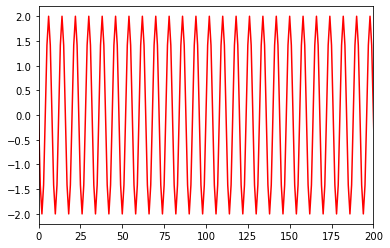

In [2]:
f, fs = 32, 256;
dt = 1/fs;
t = np.arange(0, 1, dt);
X = 2 * np.cos(2*np.pi*f*t + np.pi/2); #+ 10 * np.cos(2*np.pi*2*f*t);
plt.plot(X, 'red');
plt.xlim(0, 200);
plt.show()

(0.0, 55.0)

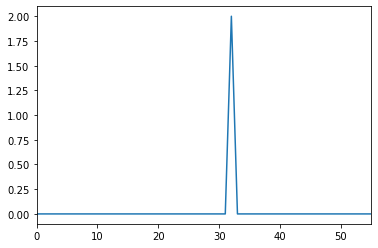

In [224]:
spectrum = np.fft.fft(X);
plt.plot(2*abs(spectrum)/len(X));
plt.xlim(0, 55)

255.99999999999983 (256, 256)


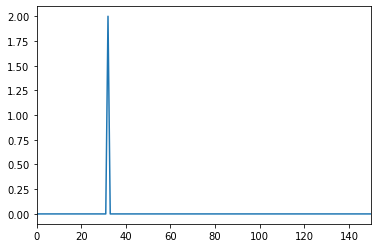

In [225]:
k = np.arange(0, len(X));
n = k.reshape(len(X), 1);
comp = np.exp(-2j*np.pi*k*n/len(X));
fourie = np.dot(comp, X);
plt.plot(2 * abs(fourie)/len(X));
plt.xlim(0, 150)
print(abs(fourie[32]), comp.shape)

In [211]:
DFT = [];
for i in range(len(X)):
    fourie_1 = []
    for i_1 in range(len(X)):
        fourie_1.append(X[i_1] * np.exp(-2*np.pi*1j*i_1*i/len(X)));
    DFT.append(np.sum(fourie_1));

In [219]:
def Fourie(X, tn, dt, f):
    DFT_am = [];
    for i in range(len(X)):
        if i<= tn:
            X_am = X[:i];
            n = np.arange(i);
            compl_a = np.exp(-2*np.pi*1j*f*n*dt);
            #print(X_am*compl_a)
            DFT_am.append(2 * np.sum(X_am * compl_a)/tn);
        else:
            X_am = X[(i-tn):i];
            #n = np.arange(i, i+tn);
            J = np.arange(0, tn);
            compl_a = np.exp(-2*np.pi*1j*f*J*dt);
            DFT_am.append(2 * np.sum(X_am * compl_a)/tn);
    return(np.asarray(DFT_am));

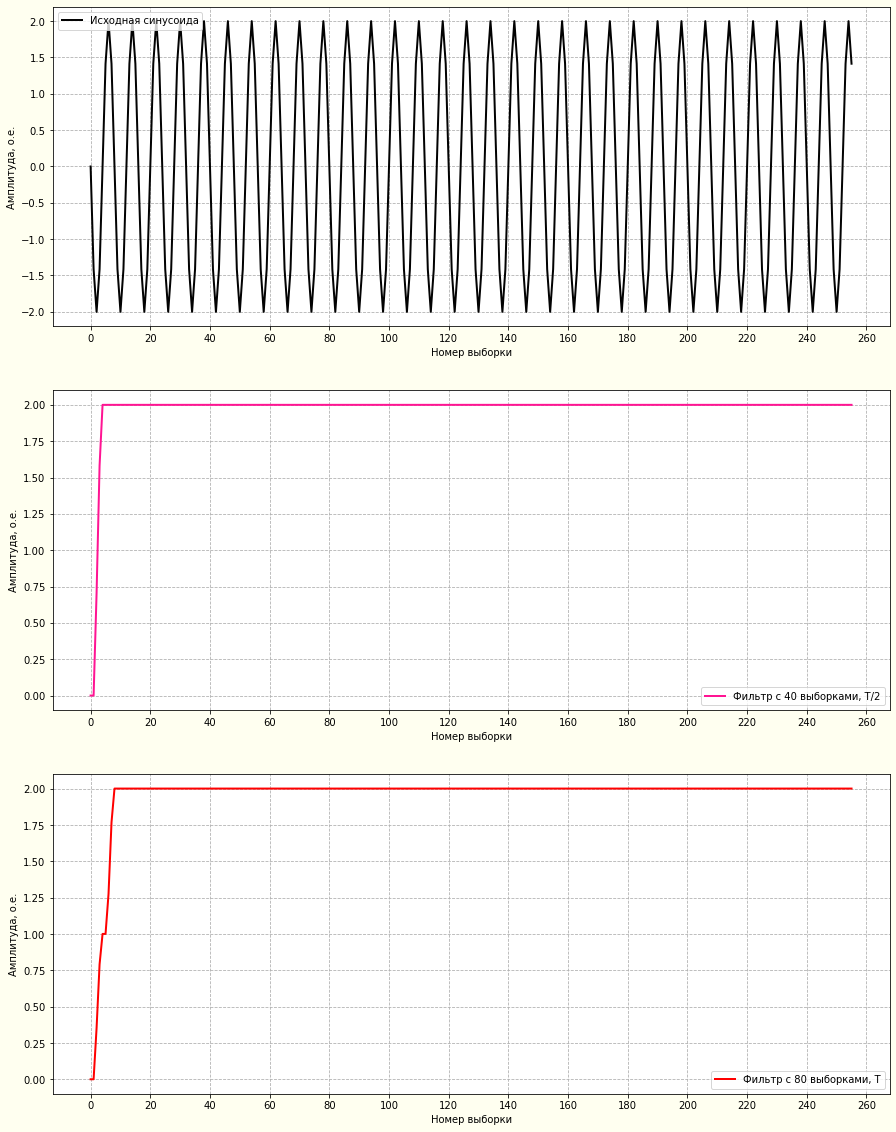

In [226]:
tn_10 = 4;
ms_10 = Fourie(X, tn_10, dt, f);
fig = plt.figure(figsize = (15, 20), facecolor = 'ivory');
ax_1 = fig.add_subplot(3, 1, 1);
ax_1.plot(X, color = 'black', Linewidth = 2.0, label = 'Исходная синусоида', alpha = 3);
ax_1.set(xticks = (np.arange(0, len(ms_10)+20, 20)), xlabel = 'Номер выборки', ylabel = 'Амплитуда, о.е.');
ax_1.grid(linestyle = '--');
ax_1.legend();
ax_2 = fig.add_subplot(3, 1, 2);
ax_2.plot(range(len(ms_10)), np.abs(ms_10), 'Deeppink', Linewidth = 2.0, label = 'Фильтр с 40 выборками, T/2');
ax_2.set(xticks = (np.arange(0, len(ms_10)+20, 20)), xlabel = 'Номер выборки', ylabel = 'Амплитуда, о.е.');
ax_2.grid(linestyle = '--');
ax_2.legend();
tn_20 = 8;
ms_20 = Fourie(X, tn_20, dt, f);
ax_3 = fig.add_subplot(3, 1, 3);
ax_3.plot(range(len(ms_20)), np.abs(ms_20), 'red', Linewidth = 2.0, label = 'Фильтр с 80 выборками, T');
ax_3.set(xticks = (np.arange(0, len(ms_20)+20, 20)), xlabel = 'Номер выборки', ylabel = 'Амплитуда, о.е.');
ax_3.grid(linestyle = '--');
ax_3.legend();
plt.show()

In [7]:
def fourie_slow(X):
    #X = np.asarray(X, dtype = 'float');
    #N = X.shape[0];
    #k = np.arange(N);
    #n = k.reshape((N , 1))
    #M = np.exp(-2j*np.pi*k*n/N)
    #return(np.dot(X, M))
    x = np.asarray(X, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [176]:
print(fourie_slow(X).shape)

(256,)


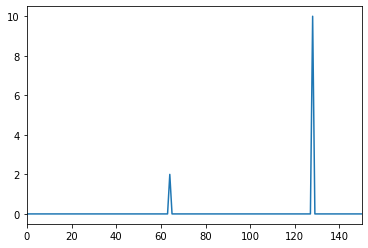

In [111]:
plt.plot(2 * abs(fourie_slow(X))/len(X));
plt.xlim(0, 150);
plt.show()

In [171]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0];
    print(N)
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        print('a')
        #print(fourie_slow(x))
        return fourie_slow(x)
        #print(fourie_slow(x).shape)
    else:
        X_even = FFT(x[::2]);
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N);
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                               X_even + factor[int(N / 2):] * X_odd])

In [230]:
def BPF(X):
    X = np.asarray(X, dtype = float);
    N = X.shape[0];
    #print(N)
    if N % 2 > 0: 
        raise ValueError('Size of input matix must be power of 2');
    elif N <= 32:
        return fourie_slow(X);
    else:
        X_even = BPF(X[::2]);
        X_odd = BPF(X[1::2]);
        W_n = np.exp(-2j * np.pi * np.arange(N) / N);
        return np.hstack((X_even + W_n[:int(N/2)] * X_odd, X_even - W_n[int(N/2):] * X_odd))

(0.0, 100.0)

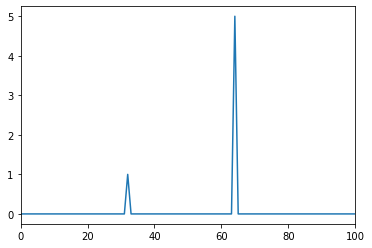

In [229]:
plt.plot(abs(BPF(X))/len(X));
plt.xlim(0, 100)

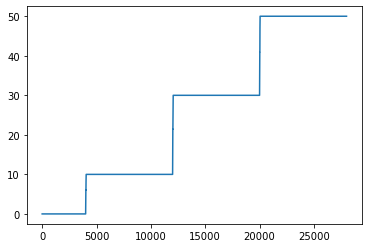

In [196]:
import pandas as pd
f = 50;
data = pd.read_csv('50.csv');
t = data.values[:, 0];
dt = t[2] - t[1];
X = data.values[:, 1];
plt.plot(np.abs(Fourie(X, 40, dt, f)));
plt.show();

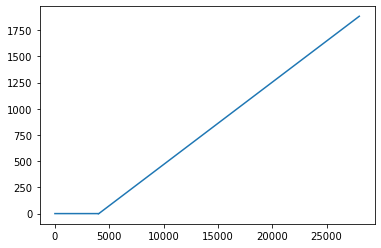

In [180]:
plt.plot(np.unwrap(np.angle(Fourie(X, 40, dt, f))))

In [203]:
print(dt)

0.00390625


In [236]:
print(np.angle(3 - 1j*4, deg = True))

-53.13010235415598
